In [1897]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


In [1898]:
# def imshow(path):
#     # image = cv2.imread(path)
#     modified = cv2.cvtColor(path,cv2.COLOR_BGR2RGB)
#     # gray_image = cv2.cvtColor(modified,cv2.COLOR_RGB2GRAY)
#     return plt.imshow(modified)

def imshow(raw_pic):
    modified = cv2.cvtColor(raw_pic,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,14))
    return plt.imshow(modified)

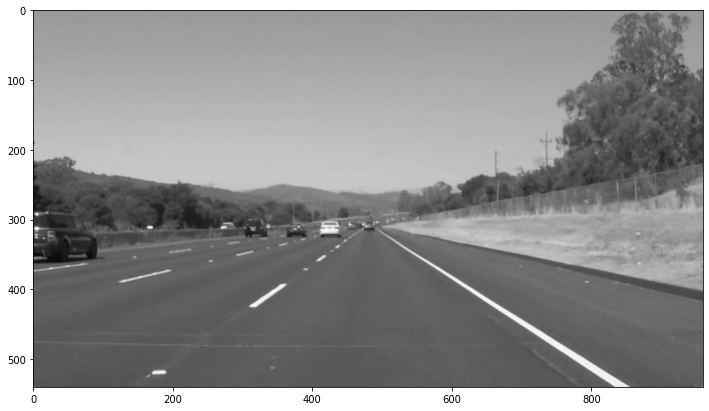

In [1899]:
image = cv2.imread('./Images/solidWhiteRight.jpg')
gray_image = cv2.imread('./Images/solidWhiteRight.jpg',cv2.IMREAD_GRAYSCALE)
gray_image
imshow(gray_image)

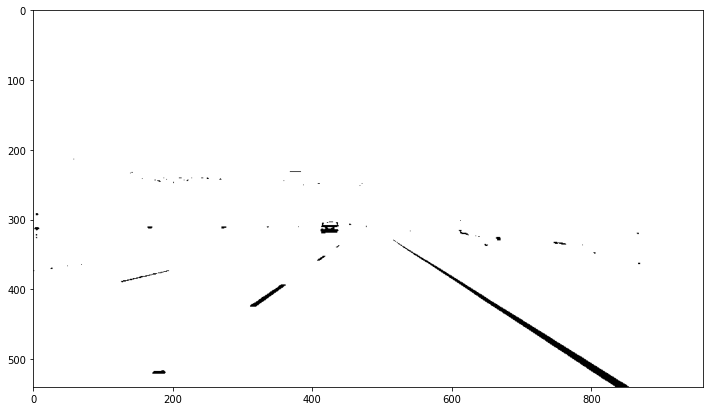

In [1900]:
retval, dst = cv2.threshold(gray_image,200,255,cv2.THRESH_BINARY_INV)

imshow(dst)

In [1901]:
# cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
# ret, threshold = cv2.threshold(gray_image,200,255,cv2.THRESH_BINARY_INV)
# imshow(threshold)

# dilation = cv2.dilate(threshold,cross,iterations=1)
# imshow(dilation)

In [1902]:
# ret, otsu = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# plt.imshow(otsu,cmap='gray')

In [1903]:
contours, hierarchy = cv2.findContours(dst,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)

In [1904]:
len(contours)

67

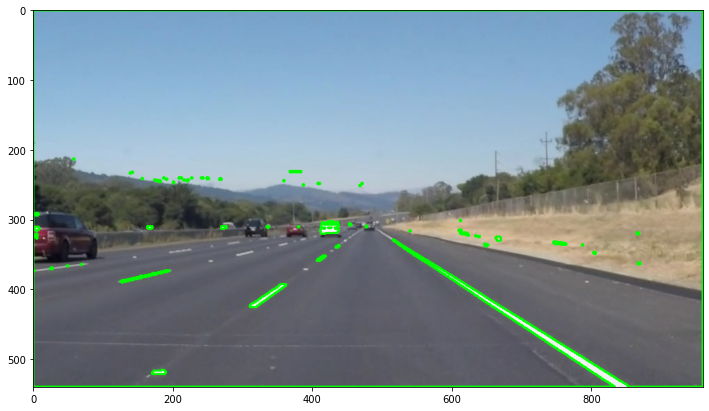

In [1905]:
copy = image.copy()
cv2.drawContours(copy,contours,-1,(0,255,0),2)
imshow(copy)

In [1906]:
sorted_contours = sorted(contours,key=cv2.contourArea, reverse=True)

In [1907]:
sorted_contours

[array([[[0, 0]],
 
        [[0, 1]],
 
        [[0, 2]],
 
        ...,
 
        [[3, 0]],
 
        [[2, 0]],
 
        [[1, 0]]], dtype=int32),
 array([[[354, 393]],
 
        [[355, 392]],
 
        [[356, 392]],
 
        [[357, 392]],
 
        [[358, 392]],
 
        [[359, 392]],
 
        [[360, 392]],
 
        [[361, 392]],
 
        [[362, 393]],
 
        [[362, 394]],
 
        [[361, 395]],
 
        [[360, 395]],
 
        [[359, 396]],
 
        [[358, 397]],
 
        [[357, 398]],
 
        [[356, 398]],
 
        [[355, 399]],
 
        [[354, 400]],
 
        [[353, 400]],
 
        [[352, 401]],
 
        [[351, 402]],
 
        [[350, 403]],
 
        [[349, 403]],
 
        [[348, 404]],
 
        [[347, 405]],
 
        [[346, 405]],
 
        [[345, 406]],
 
        [[344, 407]],
 
        [[343, 408]],
 
        [[342, 408]],
 
        [[341, 409]],
 
        [[340, 410]],
 
        [[339, 410]],
 
        [[338, 411]],
 
        [[337, 412]],
 
        [[33

In [1908]:
len(sorted_contours)

67

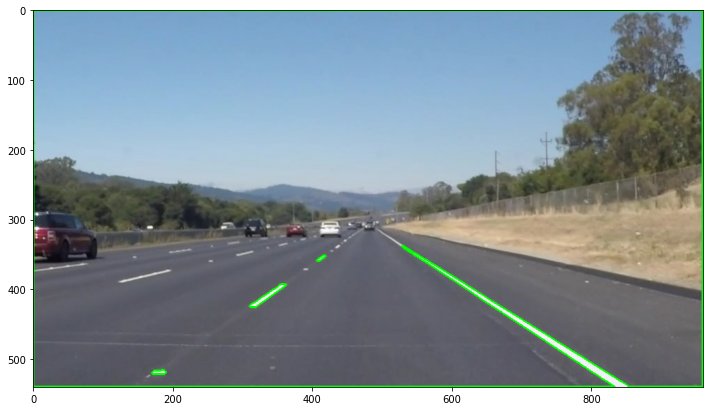

In [1909]:
copy1 = image.copy() # 0:3, 5, 7
list = [0,1,4,7]
for i in list:
    cv2.drawContours(copy1,sorted_contours[i],-1,(0,255,0),2)
imshow(copy1)

In [1910]:
# # Lines
# copy1 = image.copy()
# first_point = (180,520)

# second_point = (410,360)

# color = (255,255,0)

# thickness = 2
# cv2.line(copy1,first_point,second_point,color,thickness)
# imshow(copy1)

In [1911]:
copy1 = image.copy()
# edges = cv2.Canny(copy1,50,150,apertureSize = 3)
edges = cv2.Canny(copy1,0,255,apertureSize = 3)

In [1912]:
lines1 = cv2.HoughLinesP(edges,1,np.pi/180,200,minLineLength=2,maxLineGap=150)

In [1913]:
lines2 = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=0,maxLineGap=150)

In [1914]:
print(lines1)


[[[399 254 854 538]]

 [[395 253 854 539]]

 [[460 295 836 539]]

 [[394 291 959 401]]

 [[365 325 942 223]]]


In [1915]:
print(lines2)

[[[399 254 854 538]]

 [[395 253 836 539]]

 [[398 254 854 539]]

 [[398 291 873 384]]

 [[368 325 945 224]]

 [[654 422 834 539]]

 [[  1 372 600 299]]

 [[125 387 955 210]]

 [[394 292 959 401]]

 [[751 136 941  12]]

 [[  3 316 515 307]]

 [[ 23 371  78 364]]

 [[397 290 729 355]]

 [[ 21 330 171 309]]

 [[  5 327 959 261]]

 [[175 521 585 245]]

 [[475 304 629 404]]

 [[175 375 955 209]]

 [[424 326 952 214]]

 [[310 423 560 254]]

 [[ 16 331 959 265]]

 [[385 281 938 193]]

 [[304 324 958 255]]

 [[  9 312 558 303]]

 [[ 30 362 229 341]]]


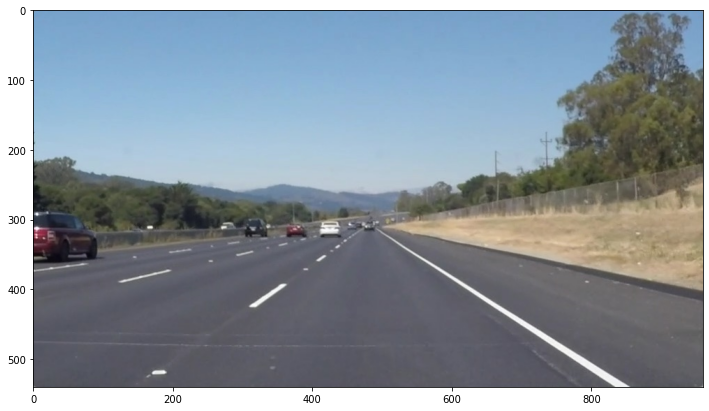

In [1916]:
imshow(copy1)

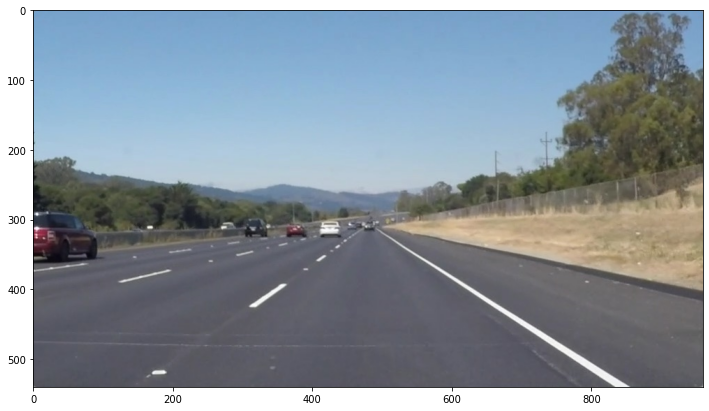

In [1917]:
# for rho,theta in lines[0]:
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     # x2 = int(x0 + 600*(-b))
#     # y2 = int(y0 + 600*(-a))
#     x2 = int(500)
#     y2 = int(320)

#     x1 = int(x0 - 1000*(-b))
#     y1 = int(y0 - 1000*(a))
#     cv2.line(copy1,(x1,y1),(x2,y2),(0,0,255),2)
#     print(a,b)
#     print(x0,y0)
imshow(copy1)
#cv2.imwrite('new.jpg',copy1) 

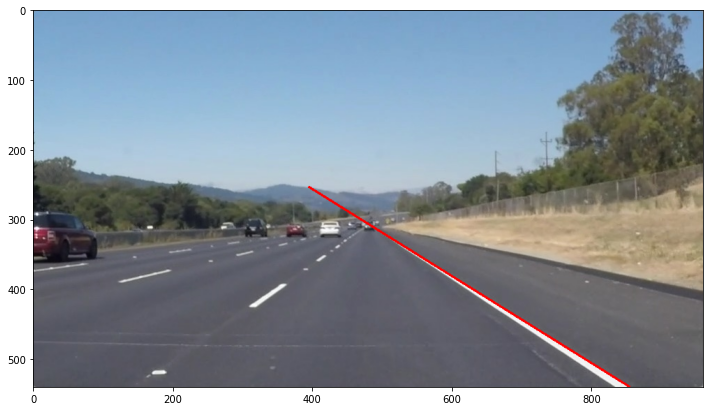

In [1918]:
for x1,y1,x2,y2 in lines1[1]:
    cv2.line(copy1,(x1,y1),(x2,y2),(0,0,255),2)
imshow(copy1)

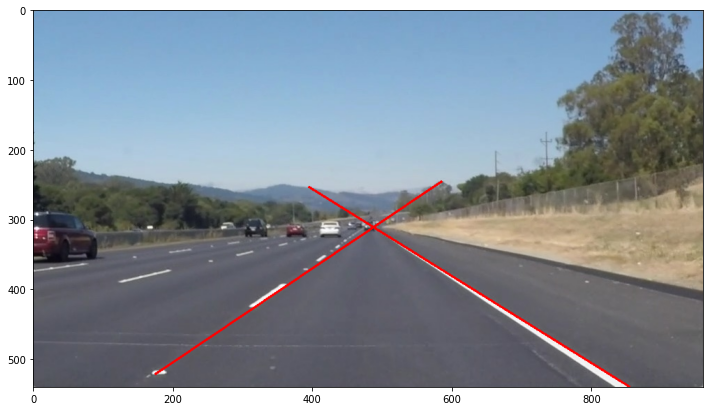

In [1919]:
for x1,y1,x2,y2 in lines2[15]:
    cv2.line(copy1,(x1,y1),(x2,y2),(0,0,255),2)
imshow(copy1)